In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# --------------------------------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------------------------------
# --------1. Plot the dataset using different colors for the three classes. A. speed vs price B.speed vs hp ----------
# --------------------------------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------------------------------

In [3]:
def read_csv_to_dataframe(file_path):
    dataframe = pd.read_csv(file_path)
    return dataframe

In [4]:
def plot_data(df, x_column, y_column, color_column):
    dataframe = df.copy(deep=False)
    dataframe['Model'] = dataframe['Model'].replace('Series N', 'red').replace('Series M', 'blue').replace('Series L', 'green')
    plt.scatter(dataframe[x_column], dataframe[y_column], c=dataframe[color_column])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Scatter plot of {y_column} vs {x_column}")
    plt.show()

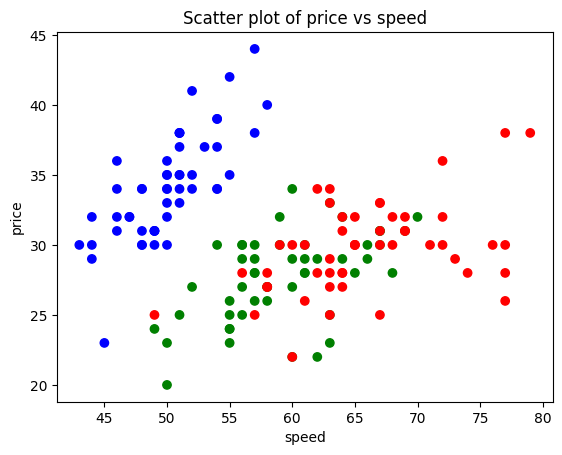

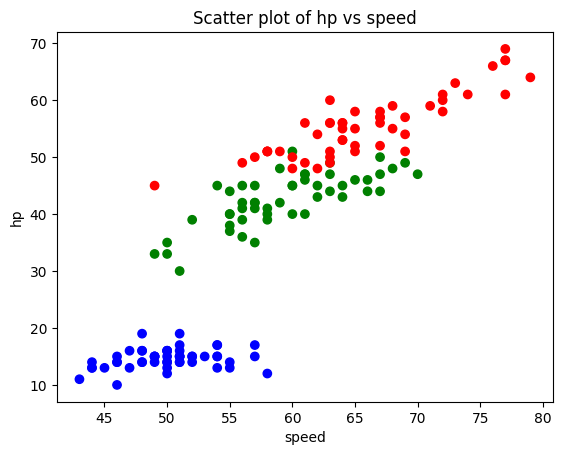

In [5]:
file_path = 'dataset_1.csv' 
df = read_csv_to_dataframe(file_path)
plot_data(df, 'speed', 'price', 'Model')
plot_data(df, 'speed', 'hp', 'Model')

In [47]:
# ------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------
# ----2. Implement the Linear Classifier and visualize the classified samples based on the speed and price features.------
# ------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [48]:
# ------------------------------------------------------------------------------------------------------------------------
# -------------------------------------2a. Implemented the linear classifier ---------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [49]:
def linear_regression_weight_vector_and_intercept(X, y_):
    X_b = np.hstack((np.ones((X.shape[0], 1)), X))
    weight_vector = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_)
    return weight_vector[1:], weight_vector[0] 

In [50]:
# ------------------------------------------------------------------------------------------------------------------------
# ---------------------------2b. Plotting the hyperplanes obtained by linear classifier ----------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [51]:
def plot_linear_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l):
    dataframe = df
    x_column = 'speed'
    y_column = 'price'
    x_values = dataframe[x_column].values.tolist()
    line_x = np.linspace(min(x_values), max(x_values), 100)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.plot(line_x, line_y_m, color='purple', label='M vs non-M')
    plt.plot(line_x, line_y_n, color='yellow', label='N vs non-N')
    plt.plot(line_x, line_y_l, color='black', label='L vs non-L')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xlim(40, 80)  
    plt.ylim(15, 50)  
    plt.title(f"Hyperplanes obtained by linear classifier")
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()

In [52]:
X = np.array(df[['speed', 'price']].values.tolist())
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '-1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '-1').replace('Series L', '1').values.tolist(), dtype=np.float64)

weight_vector_m, intercept_m = linear_regression_weight_vector_and_intercept(X, y_m)
weight_vector_n, intercept_n = linear_regression_weight_vector_and_intercept(X, y_n)
weight_vector_l, intercept_l = linear_regression_weight_vector_and_intercept(X, y_l)

In [53]:
dataframe = df
x_column = 'speed'
y_column = 'price'
x_values = dataframe[x_column].values.tolist()
line_x = np.linspace(min(x_values), max(x_values), 100)
line_y_m = - (weight_vector_m[0] * line_x + intercept_m) / weight_vector_m[1]
line_y_n = - (weight_vector_n[0] * line_x + intercept_n) / weight_vector_n[1]
line_y_l = - (weight_vector_l[0] * line_x + intercept_l) / weight_vector_l[1]

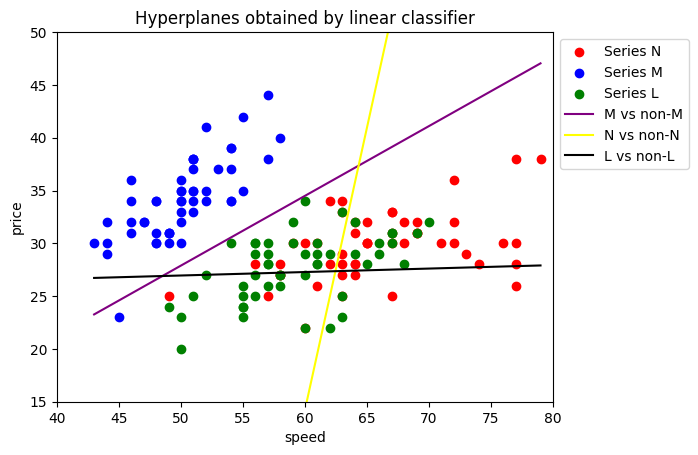

In [54]:
plot_linear_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l)

In [55]:
def condition_function_linear_regression(x, y):
    value_1 = (weight_vector_m[0] * x + weight_vector_m[1] * y + intercept_m)
    value_2 = (weight_vector_n[0] * x + weight_vector_n[1] * y + intercept_n) 
    value_3 = (weight_vector_l[0] * x + weight_vector_l[1] * y + intercept_l)
    if value_1 >= value_2 and value_1 >= value_3:
        return 0
    if value_2 >= value_1 and value_2 >= value_3:
        return 1
    if value_3 >= value_2 and value_3 >= value_1:
        return 2

In [56]:
# ------------------------------------------------------------------------------------------------------------------------
# ---------------------------2c. Plotting the decision boundary of by linear classifier ----------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [57]:
def plot_linear_regression_decision_boundary():
    x_min, x_max = 40, 80
    y_min, y_max = 15, 50
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(condition_function_linear_regression)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.legend()
    plt.title('Coloring the X-Y Plane based on linear regression desicion boundary')
    plt.show()

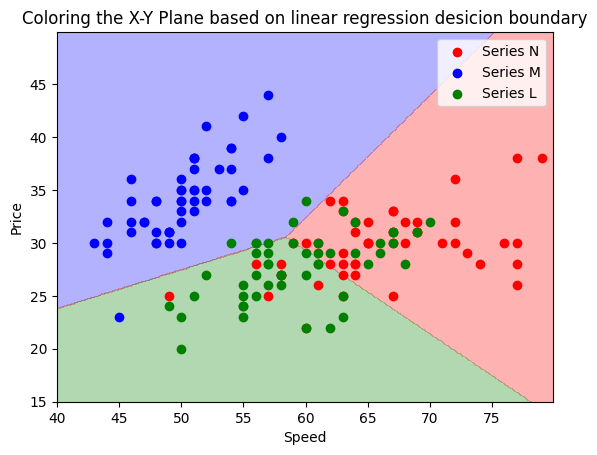

In [58]:
plot_linear_regression_decision_boundary()

In [ ]:
# ------------------------------------------------------------------------------------------------------------------------
# ---------------------------2d. Plotting the misclassified points by linear classifier ----------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [67]:
def get_linear_classifier_missclassified_points(df, x_column, y_column):
    x_column_missclassified = []
    y_column_missclassified = []
    for index, row in df.iterrows():
        if condition_function_linear_regression(row[x_column], row[y_column]) == 0 and row['Model'] != 'Series M':
            x_column_missclassified.append(row[x_column])
            y_column_missclassified.append(row[y_column])
        elif condition_function_linear_regression(row[x_column], row[y_column]) == 1 and row['Model'] != 'Series N':
            x_column_missclassified.append(row[x_column])
            y_column_missclassified.append(row[y_column])
        elif condition_function_linear_regression(row[x_column], row[y_column]) == 2 and row['Model'] != 'Series L':
            x_column_missclassified.append(row[x_column])
            y_column_missclassified.append(row[y_column])
    return x_column_missclassified, y_column_missclassified

In [68]:
def plot_linear_regression_decision_boundary_with_missclassification():
    x_min, x_max = 40, 80
    y_min, y_max = 15, 50
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(condition_function_linear_regression)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    x_column_missclassified, y_column_missclassified = get_linear_classifier_missclassified_points(df, x_column, y_column)
    plt.scatter(x_column_missclassified, y_column_missclassified, c='black', label='Missclassiied')
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.legend()
    plt.title('Coloring the X-Y Plane based linear regression desicion boundary')
    plt.show()

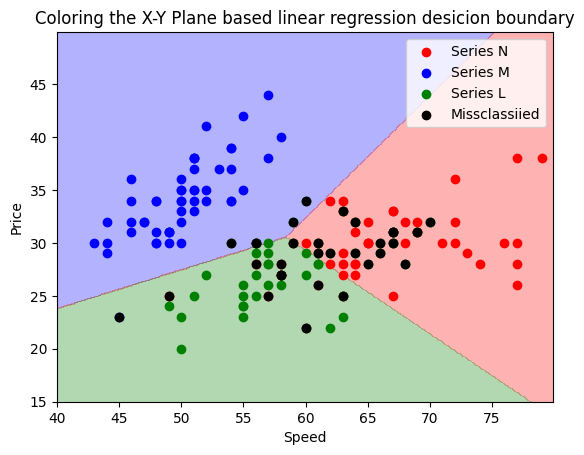

In [69]:
plot_linear_regression_decision_boundary_with_missclassification()

In [444]:
# ------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------
# -------------------------------------3. Implement a Regularised logistic regressor. ------------------------------------
# ------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [445]:
# ------------------------------------------------------------------------------------------------------------------------
# ----------------------------------- 3a. Implemented the ridge logistic regression --------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [34]:
def sigmoid(z):
    rt = []
    for idx in range(len(z)):
        if z[idx] >= 0:
            rt.append(1 / (1 + np.exp(-z[idx])))
        else:
            rt.append(np.exp(z[idx]) / (1 + np.exp(z[idx])))
    return np.array(rt)

In [35]:
def l2_regularised_logistic_regression_weight_vector_and_intercept(X, y_, iterations, learning_rate, lamda):
    row, col = X.shape
    weight_vector = np.zeros(col)
    intercept = 0
    for _ in range(iterations):
        value = np.dot(X, weight_vector) + intercept
        y_predicted = sigmoid(value)
        dw = (1 / row) * np.dot(X.T, (y_predicted - y_)) + lamda * weight_vector
        db = (1 / row) * np.sum(y_predicted - y_)
        weight_vector -= learning_rate * dw
        intercept -= learning_rate * db
    return weight_vector, intercept

In [36]:
def spilt_data_into_training_and_testing(df, random_state):
    df_shuffled = df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    total_rows = len(df_shuffled)
    train_rows = int(0.8 * total_rows)
    train_df = df_shuffled[:train_rows]
    test_df = df_shuffled[train_rows:]
    return train_df, test_df

In [37]:
def plot_l2_regularised_logistic_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l):
    dataframe = df
    x_column = 'speed'
    y_column = 'price'
    x_values = dataframe[x_column].values.tolist()
    line_x = np.linspace(min(x_values), max(x_values), 100)

    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.plot(line_x, line_y_m, color='purple', label='M vs non-M')
    plt.plot(line_x, line_y_n, color='yellow', label='N vs non-N')
    plt.plot(line_x, line_y_l, color='black', label='L vs non-L')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Scatter plot of {y_column} vs {x_column}")
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()

In [38]:
def softmax(z):
    exp_values = np.exp(z)
    return exp_values / np.sum(exp_values)

In [39]:
def l2_regularised_condition_function(x, y):
    z_1 = (weight_vector_m[0] * x + weight_vector_m[1] * y + intercept_m) / np.linalg.norm(weight_vector_m)
    z_2 = (weight_vector_n[0] * x + weight_vector_n[1] * y + intercept_n) / np.linalg.norm(weight_vector_n)
    z_3 = (weight_vector_l[0] * x + weight_vector_l[1] * y + intercept_l) / np.linalg.norm(weight_vector_l)
    [value_1, value_2, value_3] = softmax(np.array([z_1, z_2, z_3]))
    if value_1 >= value_2 and value_1 >= value_3:
        return 0
    if value_2 >= value_1 and value_2 >= value_3:
        return 1
    if value_3 >= value_2 and value_3 >= value_1:
        return 2

In [40]:
def plot_l2_regularised_logistic_regression_decision_boundary():
    x_min, x_max = 40, 80
    y_min, y_max = 15, 50
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(l2_regularised_condition_function)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.legend()
    plt.title('Coloring the X-Y Plane based on L2 regularised decision boundary')
    plt.show()

In [98]:
num_iterations = 100000
leaning_rate = 0.01
seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
lamdas = [0.01, 0.1, 1, 10, 100]

for lamda in lamdas:
    training_accuracy = []
    testing_accuracy = []
    for i in range(10):
        seed = seeds[i]
        train_df, test_df = spilt_data_into_training_and_testing(df, seed)
        
        X_train = np.array(train_df[['speed', 'price']].values.tolist())
        y_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
        y_m_train = np.array(train_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_n_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_l_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)
    
        X_test = np.array(test_df[['speed', 'price']].values.tolist())
        y_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
        y_m_test = np.array(test_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_n_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_l_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)
    
        weight_vector_m, intercept_m = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_m_train, num_iterations, leaning_rate, lamda)
        weight_vector_n, intercept_n = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_n_train, num_iterations, leaning_rate, lamda)
        weight_vector_l, intercept_l = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_l_train, num_iterations, leaning_rate, lamda)
    
        training_error = len(X_train)
        for i in range(len(X_train)):
            if l2_regularised_condition_function(X_train[i][0], X_train[i][1]) != y_train[i]:
                training_error -= 1
            
        testing_error = len(X_test)
        for i in range(len(X_test)):
            if l2_regularised_condition_function(X_test[i][0], X_test[i][1]) != y_test[i]:
                testing_error -= 1
    
        training_accuracy.append(training_error/len(X_train))
        testing_accuracy.append(testing_error/len(X_test))
        
    print("Lamda :", lamda)
    print("Training Accuracy mean: ", round(np.mean(np.array(training_accuracy)), 3))
    print("Training Accuracy std: ", round(np.std(np.array(training_accuracy)), 3))
    print("Testing Accuracy mean: ", round(np.mean(np.array(testing_accuracy)), 3))
    print("Testing Accuracy std: ", round(np.std(np.array(testing_accuracy)), 3))
    print(" ")

Lamda : 0.01
Training Accuracy mean:  0.677
Training Accuracy std:  0.055
Testing Accuracy mean:  0.643
Testing Accuracy std:  0.129
 
Lamda : 0.1
Training Accuracy mean:  0.651
Training Accuracy std:  0.039
Testing Accuracy mean:  0.617
Testing Accuracy std:  0.073
 
Lamda : 1
Training Accuracy mean:  0.522
Training Accuracy std:  0.105
Testing Accuracy mean:  0.493
Testing Accuracy std:  0.174
 
Lamda : 10
Training Accuracy mean:  0.432
Training Accuracy std:  0.102
Testing Accuracy mean:  0.38
Testing Accuracy std:  0.133
 
Lamda : 100
Training Accuracy mean:  0.529
Training Accuracy std:  0.128
Testing Accuracy mean:  0.427
Testing Accuracy std:  0.174
 


In [454]:
# ------------------------------------------------------------------------------------------------------------------------
# ----------------------------------- 3b. Repeat experiment with different beta values -----------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [146]:
lamda = 0.01
num_iterations = 100000
beta_values = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
training_accuracy = []
testing_accuracy = []

for beta in beta_values:
    beta = round(beta, 4)
    training_accuracy_i = []
    testing_accuracy_i = []
    
    for i in range(10):
        seed = seeds[i]
        train_df, test_df = spilt_data_into_training_and_testing(df, seed)
        
        X_train = np.array(train_df[['speed', 'price']].values.tolist())
        y_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
        y_m_train = np.array(train_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_n_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_l_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)
    
        X_test = np.array(test_df[['speed', 'price']].values.tolist())
        y_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
        y_m_test = np.array(test_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_n_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_l_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)
    
        weight_vector_m, intercept_m = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_m_train, num_iterations, beta, lamda)
        weight_vector_n, intercept_n = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_n_train, num_iterations, beta, lamda)
        weight_vector_l, intercept_l = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_l_train, num_iterations, beta, lamda)
    
        training_error = len(X_train)
        for i in range(len(X_train)):
            if l2_regularised_condition_function(X_train[i][0], X_train[i][1]) != y_train[i]:
                training_error -= 1
                
        testing_error = len(X_test)
        for i in range(len(X_test)):
            if l2_regularised_condition_function(X_test[i][0], X_test[i][1]) != y_test[i]:
                testing_error -= 1
    
        training_accuracy_i.append(training_error/len(X_train))
        testing_accuracy_i.append(testing_error/len(X_test))
        
    training_accuracy.append(round(np.mean(np.array(training_accuracy_i)), 5))
    testing_accuracy.append(round(np.mean(np.array(testing_accuracy_i)), 5))

beta_values = ['1e-4', '5e-4', '1e-3', '5e-3', '0.01', '0.05', '0.1', '0.5', '1', '5', '10'] 
print("For lamda : 0.01")
print("For iterations : 0.01")
print("Beta values: ", beta_values)
print("Training accuracy: ", training_accuracy)
print("Testing accuarcy: ", testing_accuracy)

For lamda : 0.01
For iterations : 0.01
Beta values:  ['1e-4', '5e-4', '1e-3', '5e-3', '0.01', '0.05', '0.1', '0.5', '1', '5', '10']
Training accuracy:  [0.655, 0.66583, 0.67917, 0.62833, 0.67667, 0.65167, 0.61833, 0.61083, 0.56417, 0.3875, 0.4825]
Testing accuarcy:  [0.59, 0.59333, 0.64333, 0.6, 0.64333, 0.61333, 0.58667, 0.56333, 0.52667, 0.34333, 0.43333]


In [147]:
def plot_training_and_testing_accuracy(beta_values, training_accuracy, testing_accuracy):
    plt.plot(beta_values, training_accuracy, color = 'green', label = 'Training accuracy')
    plt.plot(beta_values, testing_accuracy, color = 'yellow', label = 'Testing accuracy')
    plt.xlabel('beta')
    plt.ylabel('accuracy')
    plt.title('Plot of beta vs accuracy')
    plt.legend() 
    plt.xticks(rotation=60)
    plt.ylim(0.3, 0.70)  
    plt.show()

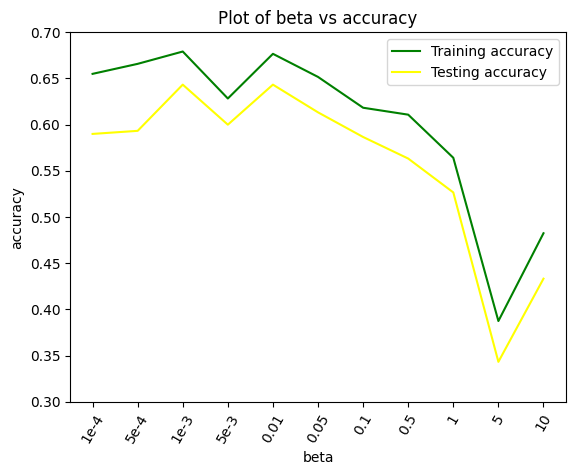

In [148]:
plot_training_and_testing_accuracy(beta_values, training_accuracy, testing_accuracy)

In [121]:
# ------------------------------------------------------------------------------------------------------------------------
# ---------------------------------------- 3c.1. Plotting the optimal regressor -----------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [149]:
beta = 0.001
lamda = 0.01
num_iterations = 100000
X = np.array(df[['speed', 'price']].values.tolist())
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

weight_vector_m, intercept_m = l2_regularised_logistic_regression_weight_vector_and_intercept(X, y_m, num_iterations, beta, lamda)
weight_vector_n, intercept_n = l2_regularised_logistic_regression_weight_vector_and_intercept(X, y_n, num_iterations, beta, lamda)
weight_vector_l, intercept_l = l2_regularised_logistic_regression_weight_vector_and_intercept(X, y_l, num_iterations, beta, lamda)

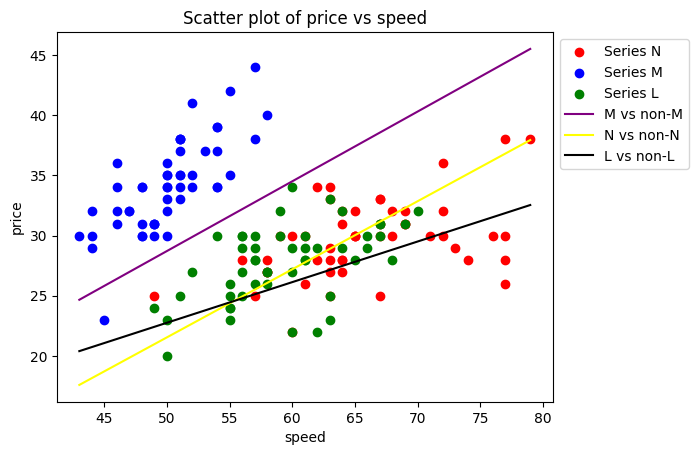

In [150]:
x_values = dataframe[x_column].values.tolist()
line_x = np.linspace(min(x_values), max(x_values), 100)
line_y_m = - (weight_vector_m[0] * line_x + intercept_m) / weight_vector_m[1]
line_y_n = - (weight_vector_n[0] * line_x + intercept_n) / weight_vector_n[1]
line_y_l = - (weight_vector_l[0] * line_x + intercept_l) / weight_vector_l[1]
plot_l2_regularised_logistic_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l)

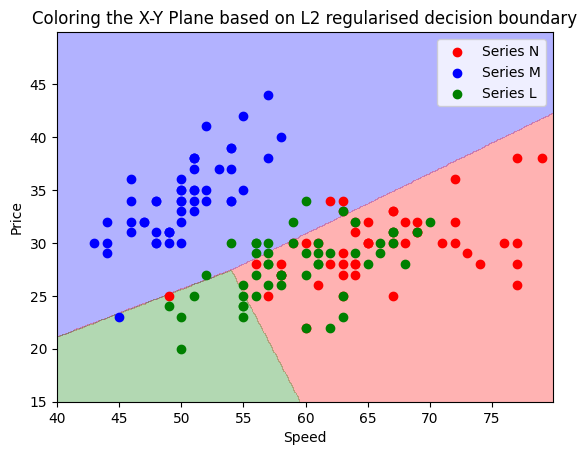

In [153]:
plot_l2_regularised_logistic_regression_decision_boundary()

In [ ]:
# ------------------------------------------------------------------------------------------------------------------------
# ----------------------- 3c.2. Comparing logistic regression with least square having linear regression -----------------
# ------------------------------------------------------------------------------------------------------------------------

In [155]:
lamda = 0.01
beta = 0.001
num_iterations = 100000
seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

training_accuracy_logistic = 0
testing_accuracy_logistic = 0
training_accuracy_linear = 0
testing_accuracy_linear = 0

training_accuracy_i_logistic = []
testing_accuracy_i_logistic = []
training_accuracy_i_linear = []
testing_accuracy_i_linear = []

for i in range(10):
    seed = seeds[i]
    train_df, test_df = spilt_data_into_training_and_testing(df, seed)
    
    X_train = np.array(train_df[['speed', 'price']].values.tolist())
    y_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
    y_m_train = np.array(train_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_n_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_l_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

    X_test = np.array(test_df[['speed', 'price']].values.tolist())
    y_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
    y_m_test = np.array(test_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_n_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_l_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

    weight_vector_m, intercept_m = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_m_train, num_iterations, beta, lamda)
    weight_vector_n, intercept_n = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_n_train, num_iterations, beta, lamda)
    weight_vector_l, intercept_l = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_l_train, num_iterations, beta, lamda)
    
    training_error_logistic = len(X_train)
    for i in range(len(X_train)):
        if l2_regularised_condition_function(X_train[i][0], X_train[i][1]) != y_train[i]:
            training_error_logistic -= 1
            
    testing_error_logistic = len(X_test)
    for i in range(len(X_test)):
        if l2_regularised_condition_function(X_test[i][0], X_test[i][1]) != y_test[i]:
            testing_error_logistic -= 1

    training_accuracy_i_logistic.append(training_error_logistic/len(X_train))
    testing_accuracy_i_logistic.append(testing_error_logistic/len(X_test))

    weight_vector_m, intercept_m = linear_regression_weight_vector_and_intercept(X, y_m)
    weight_vector_n, intercept_n = linear_regression_weight_vector_and_intercept(X, y_n)
    weight_vector_l, intercept_l = linear_regression_weight_vector_and_intercept(X, y_l)

    training_error_linear = len(X_train)
    for i in range(len(X_train)):
        if condition_function_linear_regression(X_train[i][0], X_train[i][1]) != y_train[i]:
            training_error_linear -= 1
            
    testing_error_linear = len(X_test)
    for i in range(len(X_test)):
        if condition_function_linear_regression(X_test[i][0], X_test[i][1]) != y_test[i]:
            testing_error_linear -= 1

    training_accuracy_i_linear.append(training_error_linear/len(X_train))
    testing_accuracy_i_linear.append(testing_error_linear/len(X_test))

In [156]:
training_accuracy_logistic = round(np.mean(np.array(training_accuracy_i_logistic)), 5)
testing_accuracy_logistic = round(np.mean(np.array(testing_accuracy_i_logistic)), 5)
training_accuracy_linear = round(np.mean(np.array(training_accuracy_i_linear)), 5)
testing_accuracy_linear = round(np.mean(np.array(testing_accuracy_i_linear)), 5)

print("Training accuracy of l2 regularised logistic regression: ", training_accuracy_logistic)
print("Training accuracy of linear regression: ", training_accuracy_linear)
print("Testing accuarcy of l2 regularised logistic regression: ", testing_accuracy_logistic)
print("Testing accuracy of linear regression: ", testing_accuracy_linear)

Training accuracy of l2 regularised logistic regression:  0.67917
Training accuracy of linear regression:  0.79333
Testing accuarcy of l2 regularised logistic regression:  0.64333
Testing accuracy of linear regression:  0.79333


In [461]:
# ------------------------------------------------------------------------------------------------------------------------
# ----------------------------------- 3d. L1 and L2 regularised logistic regression --------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [43]:
def l1_and_l2_regularised_logistic_regression_weight_vector_and_intercept(X, y_, iterations, learning_rate, lamda, alpha):
    row, col = X.shape
    weight_vector = np.zeros(col)
    intercept = 0
    for _ in range(iterations):
        value = np.dot(X, weight_vector) + intercept
        y_predicted = sigmoid(value)
        dw = (1 / row) * np.dot(X.T, (y_predicted - y_)) + alpha * lamda * np.sign(weight_vector) + (1 - alpha) * lamda * weight_vector
        db = (1 / row) * np.sum(y_predicted - y_)
        weight_vector -= learning_rate * dw
        intercept -= learning_rate * db
    return weight_vector, intercept

In [44]:
def plot_l1_and_l2_regularised_logistic_regression_decision_boundary():
    x_min, x_max = 40, 80
    y_min, y_max = 15, 50
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(l2_regularised_condition_function)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.legend()
    plt.title('Coloring the X-Y Plane based on L1 and L2 regularised decision boundary')
    plt.show()

In [46]:
lamda = 0.1
beta = 0.01
num_iterations = 10000
alpha_values = np.arange(0, 1.1, 0.1)
seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

training_accuracy = []
testing_accuracy = []

for alpha in alpha_values:
    alpha = round(alpha, 3)
    training_accuracy_i = []
    testing_accuracy_i = []
    
    for i in range(10):
        seed = seeds[i]
        train_df, test_df = spilt_data_into_training_and_testing(df, seed)
        
        X_train = np.array(train_df[['speed', 'price']].values.tolist())
        y_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
        y_m_train = np.array(train_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_n_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_l_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)
    
        X_test = np.array(test_df[['speed', 'price']].values.tolist())
        y_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
        y_m_test = np.array(test_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_n_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_l_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)
    
        weight_vector_m, intercept_m = l1_and_l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_m_train, num_iterations, beta, lamda, alpha)
        weight_vector_n, intercept_n = l1_and_l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_n_train, num_iterations, beta, lamda, alpha)
        weight_vector_l, intercept_l = l1_and_l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_l_train, num_iterations, beta, lamda, alpha)
    
        training_error = len(X_train)
        for i in range(len(X_train)):
            if l2_regularised_condition_function(X_train[i][0], X_train[i][1]) != y_train[i]:
                training_error -= 1
                
        testing_error = len(X_test)
        for i in range(len(X_test)):
            if l2_regularised_condition_function(X_test[i][0], X_test[i][1]) != y_test[i]:
                testing_error -= 1
    
        training_accuracy_i.append(training_error/len(X_train))
        testing_accuracy_i.append(testing_error/len(X_test))
        
    training_accuracy.append(round(np.mean(np.array(training_accuracy_i)), 3))
    testing_accuracy.append(round(np.mean(np.array(testing_accuracy_i)), 3))

print("Training accuracy: ", training_accuracy)
print("Testing accuarcy: ", testing_accuracy)

Training accuracy:  [0.599, 0.646, 0.626, 0.604, 0.602, 0.602, 0.58, 0.595, 0.637, 0.617, 0.628]
Testing accuarcy:  [0.583, 0.61, 0.633, 0.597, 0.543, 0.537, 0.56, 0.553, 0.61, 0.613, 0.617]


In [47]:
def plot_training_and_testing_acuracy_with_alpha():
    plt.plot(alpha_values, training_accuracy, color = 'green', label = 'Training accuracy')
    plt.plot(alpha_values, testing_accuracy, color = 'yellow', label = 'Testing accuracy')
    plt.xlabel('alpha')
    plt.ylabel('accuracy')
    plt.title('Plot of alpha vs accuracy')
    plt.legend()
    plt.show()

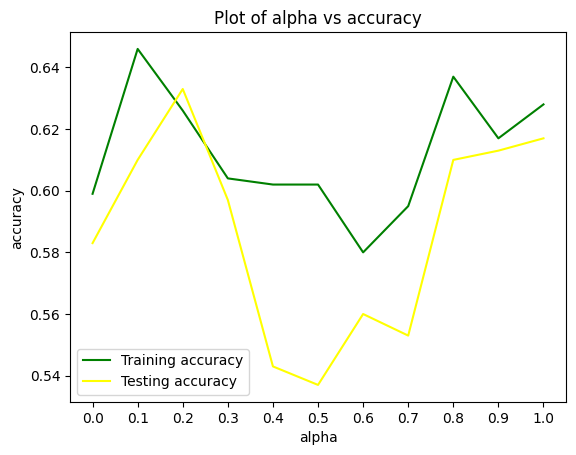

In [48]:
alpha_values = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
plot_training_and_testing_acuracy_with_alpha()

In [466]:
# ------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------
# -------------------------------------4. Implement a Vanilla logistic regressor. ----------------------------------------
# ------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [ ]:
# ------------------------------------------------------------------------------------------------------------------------
# ------------------------------------ Implementing the vanilla logistic regression --------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [21]:
def sigmoid(z):
    rt = []
    for idx in range(len(z)):
        if z[idx] >= 0:
            rt.append(1 / (1 + np.exp(-z[idx])))
        else:
            rt.append(np.exp(z[idx]) / (1 + np.exp(z[idx])))
    return np.array(rt)

In [22]:
def logistic_regression_weight_vector_and_intercept(X, y_, iterations, learning_rate):
    row, col = X.shape
    weight_vector = np.zeros(col)
    intercept = 0
    for _ in range(iterations):
        value = np.dot(X, weight_vector) + intercept
        y_predicted = sigmoid(value)
        dw = (1 / row) * np.dot(X.T, (y_predicted - y_))
        db = (1 / row) * np.sum(y_predicted - y_)
        weight_vector -= learning_rate * dw
        intercept -= learning_rate * db
    return weight_vector, intercept

In [23]:
# -------------------------------------------------------------------------------------------------------------
# ------------------------ Hyperplanes obtained by vanilla logistic regression --------------------------------
# -------------------------------------------------------------------------------------------------------------

In [24]:
def plot_logistic_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l):
    dataframe = df
    x_column = 'speed'
    y_column = 'price'
    x_values = dataframe[x_column].values.tolist()
    line_x = np.linspace(min(x_values), max(x_values), 100)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.plot(line_x, line_y_m, color='purple', label='M vs non-M')
    plt.plot(line_x, line_y_n, color='yellow', label='N vs non-N')
    plt.plot(line_x, line_y_l, color='black', label='L vs non-L')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.title("Hyperplanes obtained by vanilla logistic regression")
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()

In [25]:
num_iterations = 100000
learning_rate = 0.001
X = np.array(df[['speed', 'price']].values.tolist())
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

weight_vector_m, intercept_m = logistic_regression_weight_vector_and_intercept(X, y_m, num_iterations, learning_rate)
weight_vector_n, intercept_n = logistic_regression_weight_vector_and_intercept(X, y_n, num_iterations, learning_rate)
weight_vector_l, intercept_l = logistic_regression_weight_vector_and_intercept(X, y_l, num_iterations, learning_rate)

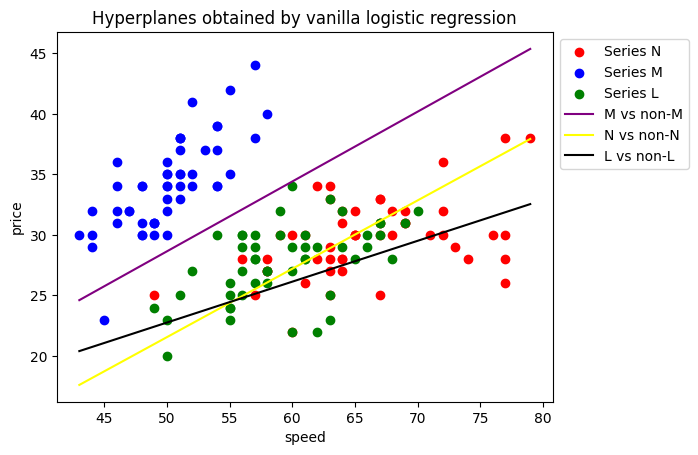

In [27]:
dataframe = df
x_column = 'speed'
y_column = 'price'
x_values = dataframe[x_column].values.tolist()
line_x = np.linspace(min(x_values), max(x_values), 100)
line_y_m = - (weight_vector_m[0] * line_x + intercept_m) / weight_vector_m[1]
line_y_n = - (weight_vector_n[0] * line_x + intercept_n) / weight_vector_n[1]
line_y_l = - (weight_vector_l[0] * line_x + intercept_l) / weight_vector_l[1]
plot_logistic_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l)

In [28]:
def softmax(z):
    exp_values = np.exp(z)
    return exp_values / np.sum(exp_values)

In [29]:
def vanilla_logistic_regression_condition_function(x, y):
    z_1 = (weight_vector_m[0] * x + weight_vector_m[1] * y + intercept_m)
    z_2 = (weight_vector_n[0] * x + weight_vector_n[1] * y + intercept_n)
    z_3 = (weight_vector_l[0] * x + weight_vector_l[1] * y + intercept_l)
    [value_1, value_2, value_3] = softmax(np.array([z_1, z_2, z_3]))
    if value_1 >= value_2 and value_1 >= value_3:
        return 0
    if value_2 >= value_1 and value_2 >= value_3:
        return 1
    if value_3 >= value_2 and value_3 >= value_1:
        return 2

In [30]:
# ---------------------------------------------------------------------------------------------------------------------
# ------------------------------- Desicion boundary of vanilla logistic regression ------------------------------------
# ---------------------------------------------------------------------------------------------------------------------

In [31]:
def plot_logistic_regression_decision_boundary():
    x_min, x_max = 40, 80
    y_min, y_max = 15, 50
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(vanilla_logistic_regression_condition_function)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.legend()
    plt.title('Coloring the X-Y Plane based on vanilla logistic regression decision boundary')
    plt.show()

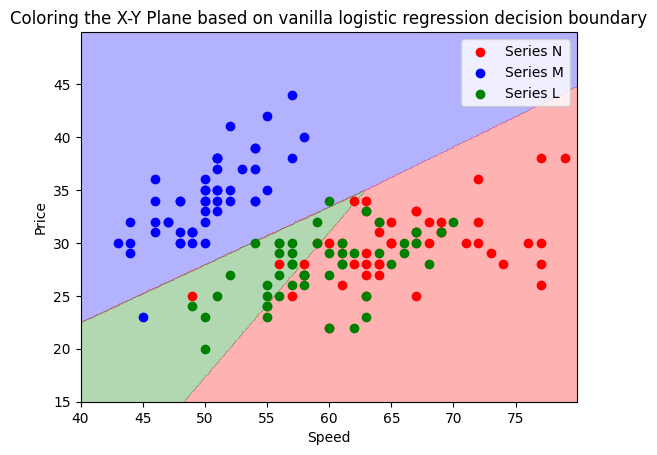

In [32]:
plot_logistic_regression_decision_boundary()

In [ ]:
# -----------------------------------------------------------------------------------------------------------------
# ------------------- Comparing vanilla logistic regression with net elastic logistic regression ------------------
# -----------------------------------------------------------------------------------------------------------------

In [41]:
lamda = 0.01
beta = 0.001
num_iterations = 100000
seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

training_accuracy_l2_logistic = 0
testing_accuracy_l2_logistic = 0
training_accuracy_vanilla_logistic = 0
testing_accuracy_vanilla_logistic = 0

training_accuracy_i_l2_logistic = []
testing_accuracy_i_l2_logistic = []
training_accuracy_i_vanilla_logistic = []
testing_accuracy_i_vanilla_logistic = []

for i in range(10):
    seed = seeds[i]
    train_df, test_df = spilt_data_into_training_and_testing(df, seed)
    
    X_train = np.array(train_df[['speed', 'price']].values.tolist())
    y_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
    y_m_train = np.array(train_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_n_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_l_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

    X_test = np.array(test_df[['speed', 'price']].values.tolist())
    y_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
    y_m_test = np.array(test_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_n_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_l_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

    weight_vector_m, intercept_m = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_m_train, num_iterations, beta, lamda)
    weight_vector_n, intercept_n = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_n_train, num_iterations, beta, lamda)
    weight_vector_l, intercept_l = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_l_train, num_iterations, beta, lamda)
    
    training_error_l2_logistic = len(X_train)
    for i in range(len(X_train)):
        if l2_regularised_condition_function(X_train[i][0], X_train[i][1]) != y_train[i]:
            training_error_l2_logistic -= 1
            
    testing_error_l2_logistic = len(X_test)
    for i in range(len(X_test)):
        if l2_regularised_condition_function(X_test[i][0], X_test[i][1]) != y_test[i]:
            testing_error_l2_logistic -= 1

    training_accuracy_i_l2_logistic.append(training_error_l2_logistic/len(X_train))
    testing_accuracy_i_l2_logistic.append(testing_error_l2_logistic/len(X_test))

    weight_vector_m, intercept_m = logistic_regression_weight_vector_and_intercept(X, y_m, num_iterations, learning_rate)
    weight_vector_n, intercept_n = logistic_regression_weight_vector_and_intercept(X, y_n, num_iterations, learning_rate)
    weight_vector_l, intercept_l = logistic_regression_weight_vector_and_intercept(X, y_l, num_iterations, learning_rate)

    training_error_vanilla_logistic = len(X_train)
    for i in range(len(X_train)):
        if vanilla_logistic_regression_condition_function(X_train[i][0], X_train[i][1]) != y_train[i]:
            training_error_vanilla_logistic -= 1
            
    testing_error_vanilla_logistic = len(X_test)
    for i in range(len(X_test)):
        if vanilla_logistic_regression_condition_function(X_test[i][0], X_test[i][1]) != y_test[i]:
            testing_error_vanilla_logistic -= 1

    training_accuracy_i_vanilla_logistic.append(training_error_vanilla_logistic/len(X_train))
    testing_accuracy_i_vanilla_logistic.append(testing_error_vanilla_logistic/len(X_test))

In [42]:
training_accuracy_l2_logistic = round(np.mean(np.array(training_accuracy_i_l2_logistic)), 5)
testing_accuracy_l2_logistic = round(np.mean(np.array(testing_accuracy_i_l2_logistic)), 5)
training_accuracy_vanilla_logistic = round(np.mean(np.array(training_accuracy_i_vanilla_logistic)), 5)
testing_accuracy_vanilla_logistic = round(np.mean(np.array(testing_accuracy_i_vanilla_logistic)), 5)

print("Training accuracy of l2 regularised logistic regression: ", training_accuracy_l2_logistic)
print("Training accuracy of linear regression: ", testing_accuracy_l2_logistic)
print("Testing accuarcy of l2 regularised logistic regression: ", training_accuracy_vanilla_logistic)
print("Testing accuracy of linear regression: ", testing_accuracy_vanilla_logistic)

Training accuracy of l2 regularised logistic regression:  0.67917
Training accuracy of linear regression:  0.64333
Testing accuarcy of l2 regularised logistic regression:  0.75833
Testing accuracy of linear regression:  0.73333
